In [145]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import listdir

#load images
#find median images
#subtract median
#find indacies
#combine sutter speeds
#show images in grid

In [146]:
path = 'data_collection/data/850nm/Bastian'
shutter_speeds = []

def split(path):
    s = path.replace('.', '_')
    s = s.split('_')
    return s

image_names = listdir(path)
splits = list(map(split, image_names))

shutter_speeds = np.unique(np.array(splits)[:,1]).astype(int)
shutter_speeds = np.sort(shutter_speeds).astype(str)

In [147]:
all_images = []
for shutter_speed in shutter_speeds:
    names = [name for name in image_names if shutter_speed in name]
    names.sort()
    images = []
    for name in names:
        gray = cv2.cvtColor(cv2.imread(path + "/" + name), cv2.COLOR_BGR2GRAY)
        images.append(gray)
    all_images.append(images)
all_images = np.array(all_images)
all_images = all_images[:,:,:,180:1500]

In [148]:
median_images = []
for images in all_images:
    median = np.median(images, axis=0).astype('uint8')
    median_images.append(median)
median_images = np.array(median_images)

In [149]:
median_subtracted = []

for median_image, images in zip(median_images, all_images):
    median_image = median_image.astype('int16')
    new_imgs = []
    for image in images:
        image = image.astype('int16')
        sub = (image-median_image)
        new_imgs.append(sub)
    median_subtracted.append(new_imgs)
    
median_subtracted = np.array(median_subtracted)

In [166]:
shutter_combine_value = 200

combine_indices = np.array(median_images).astype('int16')
combine_indices = abs(combine_indices - shutter_combine_value)
combine_indices = np.argmin(combine_indices, axis=0)

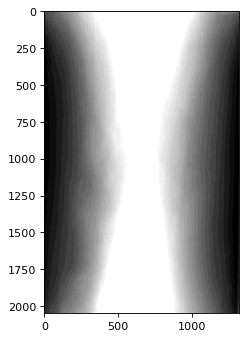

In [167]:
figure(figsize=(5, 5), dpi=80)
plt.imshow(combine_indices, cmap='gray')

In [168]:
new_images = np.zeros(shape=(2048, 1320, 19))

In [169]:
for row in range(combine_indices.shape[0]):
    for col in range(combine_indices.shape[1]):
        index = combine_indices[row][col]
        pix_values = median_subtracted[index,:,row,col]
        new_images[row][col] = pix_values

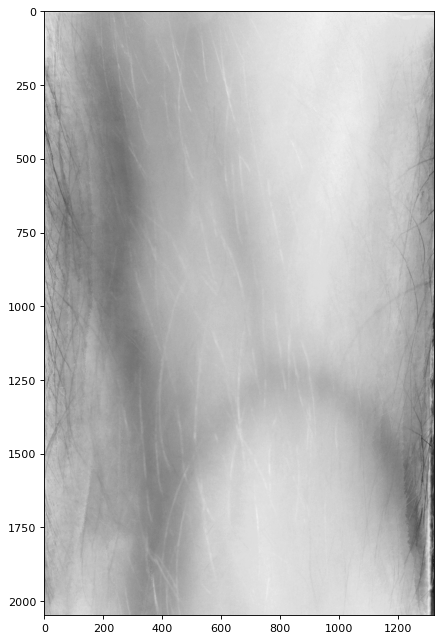

In [170]:
i = 2

figure(figsize=(10, 10), dpi=80)
plt.imshow(new_images[:,:,i], cmap='gray')

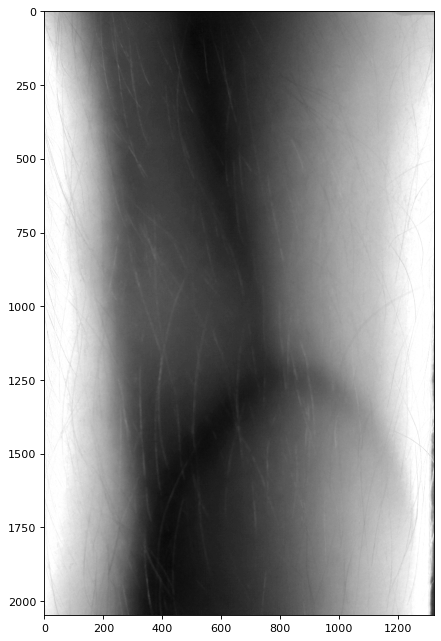

In [171]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(all_images[10][i], cmap='gray')

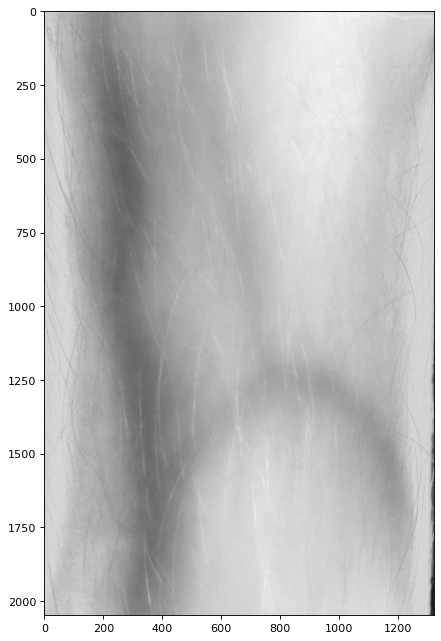

In [172]:
figure(figsize=(10, 10), dpi=80)
plt.imshow(median_subtracted[10][i], cmap='gray')